In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 20 13:12:40 2018

@author: jpmaldonado
"""

'''
Motivation: 
    Recall from the previous lecture the "guide" to choose an estimator
        http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
        
    This is an unrealistically long list of algorithms to learn in 4 sessions. 
Instead, we will do some practical exercise to see how to decide whether:
    - how to find the best parameters of a model
    - decide when and whether a different model is needed
    - decide when more data is needed
'''


######################################
## Model complexity and Grid Search 
######################################

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
# generate toy dataset:
x = np.linspace(-3, 3, 100)
y = np.sin(4 * x) + x + np.random.normal(size=len(x))
X = x[:, np.newaxis]
        

********************
n_neighbors:  1
average score:  0.554256392405136
********************
n_neighbors:  3
average score:  0.6634899485704833
********************
n_neighbors:  5
average score:  0.7197360439569428
********************
n_neighbors:  10
average score:  0.6924422323062139
********************
n_neighbors:  20
average score:  0.5542851519193879


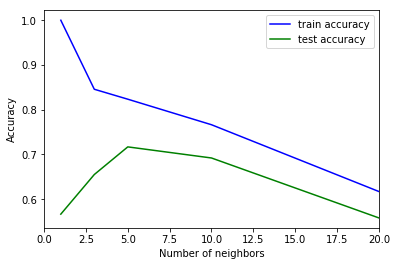

In [4]:
cv = KFold(shuffle=True)

# for each parameter setting do cross-validation:
for n_neighbors in [1, 3, 5, 10, 20]:
    scores = cross_val_score(KNeighborsRegressor(n_neighbors=n_neighbors), 
                             X, y, cv=cv)
    print('*'*20)
    print("n_neighbors: ", n_neighbors) 
    print("average score: ", np.mean(scores))


from sklearn.model_selection import validation_curve
n_neighbors = [1, 3, 5, 10, 20]
train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, 
                                             param_name="n_neighbors",
                                             param_range=n_neighbors, cv=cv)
plt.plot(n_neighbors, train_scores.mean(axis=1), 'b', label="train accuracy")
plt.plot(n_neighbors, test_scores.mean(axis=1), 'g', label="test accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.xlim([0, 20])
plt.legend(loc="best")


'\n- Find the best value of n_estimators for RandomForestClassifier\nin the digits dataset.          \n- Compare the learning curve of RandomForestClassifier and LogisticRegression\n'

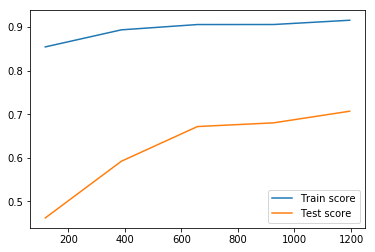

In [5]:


######################################
## Learning curve
######################################
''' 
Fancier one here: 
http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits()
X, y = digits.data, digits.target

clf = RandomForestClassifier(n_estimators = 2)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, y)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label = "Test score")
plt.legend(loc="best")


## EXERCISE 

- Find the best value of n_estimators for RandomForestClassifier
in the `iris` dataset.          
- Compare the learning curve of RandomForestClassifier and LogisticRegression
